## VACCINATED VS NON-VACCINATED 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sn
import numpy as np
import itertools as it
import copy
import math
import datetime
import scipy.stats as stats
pd.set_option('display.max_columns', 999)
import copy

In [2]:
df_covid = pd.read_csv('covid_2021_FINAL.csv',sep='\t',index_col=0,low_memory=False)
print(df_covid.shape)

(475152, 57)


# Remove inconsistent age groups

In [3]:
ageGroupList=['20','30','40','50','60','70','80']
df_covid=df_covid[df_covid['ageGroup'].isin(ageGroupList)]
df_covid.shape

(454470, 57)

# Forcing dates to be dates

In [4]:
df_covid=df_covid.astype({
    'dateFirstSymptom':"datetime64[ns]",
    'dateHospitalization':"datetime64[ns]",
    'dateEvolution':"datetime64[ns]",
    'yearMonth':"datetime64[ns]",
    'ageYearsRoundUp':'float',
    'ageGroup':'string',
    'dataFirstDose':"datetime64[ns]",
    'ICUin':"datetime64[ns]",
    'ICUout':"datetime64[ns]",
    'dataSecondDose':"datetime64[ns]",
    'ageGroup':"int"
})
ageGroupList=[20,30,40,50,60,70,80]

# Total of Patients and Lethality Per Age Group

In [5]:
# Lethality without age group
print('All df')
dictEvolution = dict(df_covid['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

print('No Vac')
dictEvolution = dict(df_covid[df_covid['VACINA_COV']==2]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

print('Vac')
dictEvolution = dict(df_covid[df_covid['VACINA_COV']==1]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

All df
297255 157215 454470 34.59304244504588
No Vac
225799 109473 335272 32.651995991314514
Vac
71456 47742 119198 40.05268544774241


In [6]:
dict(df_covid['EVOLUCAO'].value_counts())

{1.0: 297255, 2.0: 157215}

In [7]:
# Lethality without age group

print('No Vac < 60')
dictEvolution = dict(df_covid[(df_covid['VACINA_COV']==2) & (df_covid['ageGroup']<60)]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

print('No Vac >= 60')
dictEvolution = dict(df_covid[(df_covid['VACINA_COV']==2) & (df_covid['ageGroup']>=60)]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

print('Vac < 60')
dictEvolution = dict(df_covid[(df_covid['VACINA_COV']==1) & (df_covid['ageGroup']<60)]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

print('Vac >= 60')
dictEvolution = dict(df_covid[(df_covid['VACINA_COV']==1) & (df_covid['ageGroup']>=60)]['EVOLUCAO'].value_counts())
alive = dictEvolution[1]
deceased = dictEvolution[2]
total = alive+deceased
lethality = deceased/total
print(alive,deceased,total,lethality*100)

No Vac < 60
174658 56713 231371 24.511714951311962
No Vac >= 60
51141 52760 103901 50.779107034580996
Vac < 60
22966 5970 28936 20.63173901022947
Vac >= 60
48490 41772 90262 46.278611154195566


In [8]:
def ageGroupOverView(df):
    print('Lethality per age group: Vaccinated VS Non-vaccinated\n')
    lethality_df={}
    lethality_df['Age Group']=[]
    lethality_df['No Dose %']=[]
    lethality_df['1 Dose %']=[]
    lethality_df['2 Dose %']=[]

    totalPatients_df={}
    #totalPatients_df['Age Group']=[]
    totalPatients_df['No Dose A']=[]
    totalPatients_df['No Dose D']=[]
    totalPatients_df['1 Dose A']=[]
    totalPatients_df['1 Dose D']=[]
    totalPatients_df['2 Dose A']=[]
    totalPatients_df['2 Dose D']=[]
    totalPatients_df['Age Group Total']=[]

    lethality={}

    for ageG in ageGroupList:
        lethality_df['Age Group'].append(ageG)
        #totalPatients_df['Age Group'].append(ageG)
        lethality[ageG]={}
        totalCum=0

        #noVac
        status = dict(df[(df['dataFirstDose'].isna()) & (df['ageGroup']==ageG)]['EVOLUCAO'].value_counts())
        total=status[1]+status[2]    
        lethality_df['No Dose %'].append(str(round(status[2]/total*100))+'%')
        totalPatients_df['No Dose A'].append(status[1])
        totalPatients_df['No Dose D'].append(status[2])
        totalCum+=total
        lethality[ageG]['No Dose'] = status

        #1-Vac
        status = dict(df[(df['dataFirstDose'].notna()) & (df['ageGroup']==ageG)]['EVOLUCAO'].value_counts())
        total=status[1]+status[2]    
        lethality_df['1 Dose %'].append(str(round(status[2]/total*100))+'%')
        totalPatients_df['1 Dose A'].append(status[1])
        totalPatients_df['1 Dose D'].append(status[2])
        totalCum+=total
        lethality[ageG]['1 Dose'] = status

        #2-Vac
        status = dict(df[(df['dataSecondDose'].notna()) & (df['ageGroup']==ageG)]['EVOLUCAO'].value_counts())
        total=status[1]+status[2]    
        lethality_df['2 Dose %'].append(str(round(status[2]/total*100))+'%')
        totalPatients_df['2 Dose A'].append(status[1])
        totalPatients_df['2 Dose D'].append(status[2])
        lethality[ageG]['2 Dose'] = status

        #sum
        totalPatients_df['Age Group Total'].append(totalCum)

    lethality_df = pd.DataFrame(lethality_df)
    totalPatients_df = pd.DataFrame(totalPatients_df)
    return pd.merge(lethality_df,totalPatients_df, left_index=True, right_index=True)

In [9]:
ageGroupOverView(df_covid[(df_covid['UTI']==2)])

Lethality per age group: Vaccinated VS Non-vaccinated



,Age Group,No Dose %,1 Dose %,2 Dose %,No Dose A,No Dose D,1 Dose A,1 Dose D,2 Dose A,2 Dose D,Age Group Total
0,20,5%,4%,3%,11543,610,711,27,323,10,12891
1,30,7%,5%,4%,31720,2290,1930,111,815,32,36051
2,40,10%,7%,6%,44289,5070,3782,290,1325,89,53431
3,50,15%,12%,11%,44401,8103,5610,772,1981,234,58886
4,60,25%,20%,18%,25490,8626,9768,2465,5540,1215,46349
5,70,35%,27%,26%,12574,6803,11263,4263,10028,3455,34903
6,80,44%,44%,41%,5255,4199,6406,4988,5138,3506,20848


In [10]:
ageGroupOverView(df_covid[(df_covid['UTI']==1)])

Lethality per age group: Vaccinated VS Non-vaccinated



,Age Group,No Dose %,1 Dose %,2 Dose %,No Dose A,No Dose D,1 Dose A,1 Dose D,2 Dose A,2 Dose D,Age Group Total
0,20,36%,24%,18%,3058,1707,268,83,127,27,5116
1,30,41%,31%,28%,8808,6187,767,338,309,118,16100
2,40,49%,38%,32%,12366,12078,1426,874,553,263,26744
3,50,60%,51%,45%,12610,18612,2146,2191,818,656,35559
4,60,71%,63%,60%,7413,17953,3582,6149,2284,3367,35097
5,70,76%,71%,69%,3611,11672,3907,9341,3588,7959,28531
6,80,79%,77%,76%,1425,5390,1961,6719,1676,5227,15495


In [11]:
ageGroupOverView(df_covid)

Lethality per age group: Vaccinated VS Non-vaccinated



,Age Group,No Dose %,1 Dose %,2 Dose %,No Dose A,No Dose D,1 Dose A,1 Dose D,2 Dose A,2 Dose D,Age Group Total
0,20,14%,10%,8%,15516,2455,1056,121,490,42,19148
1,30,17%,14%,11%,43160,8946,2895,484,1220,158,55485
2,40,23%,18%,16%,60211,18078,5581,1247,2033,383,85117
3,50,32%,27%,24%,60835,28208,8370,3144,3023,948,100557
4,60,44%,39%,37%,35271,28190,14419,9210,8456,4893,87090
5,70,53%,47%,45%,17394,19608,16361,14603,14675,12222,67966
6,80,59%,58%,56%,7156,10208,9030,12713,7372,9449,39107


In [12]:
2455/(2455+15516)

0.13660898113627512

# ODDS RATIO

In [13]:
def OddsRatioMain(A_label,B_label,A_survived,A_deceased,B_survived,B_deceased,complete=False):
    returnDict={}
    returnDict[A_label+'_survived']=A_survived
    returnDict[A_label+'_deceased']=A_deceased
    returnDict[B_label+'_survived']=B_survived
    returnDict[B_label+'_deceased']=B_deceased    

    oddsratio,pFisherTwoSided = stats.fisher_exact([[B_survived, A_survived], [B_deceased, A_deceased]],alternative='two-sided')
    returnDict['OR']=round((oddsratio),2)

    if(oddsratio<1):
        oddsratio,pFisherLess = stats.fisher_exact([[B_survived, A_survived], [B_deceased, A_deceased]],alternative='less')
        returnDict['p-value']=round(pFisherLess,3)
    elif(oddsratio>1):    
        oddsratio,pFisherGreater = stats.fisher_exact([[B_survived, A_survived], [B_deceased, A_deceased]],alternative='greater')
        returnDict['p-value']=round(pFisherGreater,3)
    else:
        returnDict['p-value']=round(pFisherTwoSided,3)

    total=A_deceased+A_survived+B_deceased+B_survived
    if(total<=0):
        return None       
    else:
        pA = (A_survived+B_survived)/total
        pB = (B_deceased+B_survived)/total
        expectedByChance=pA*pB*total
        returnDict['expectedByChance(EBC)']=int(expectedByChance)
        returnDict[B_label+'_survived/EBC-1']=round(returnDict[B_label+'_survived']/returnDict['expectedByChance(EBC)']-1,2)
        return returnDict
    
def oddsWithInterval(table2by2):
    OR, pValue = stats.fisher_exact(table2by2,alternative='two-sided')
    if OR > 1:
        _, pValue = stats.fisher_exact(table2by2,alternative='greater')
    elif OR < 1:
        _, pValue = stats.fisher_exact(table2by2,alternative='less')
        
    #Upper 95% CI = e ^ [ln(OR) + 1.96 sqrt(1/a + 1/b + 1/c + 1/d)]
    #Lower 95% CI = e ^ [ln(OR) - 1.96 sqrt(1/a + 1/b + 1/c + 1/d)]
    values=0
    for l in table2by2:
        for v in l:
            values+= 1/v
            
    upper = math.e**(math.log(OR) + (1.96*math.sqrt(values)) )
    lower = math.e**(math.log(OR) - (1.96*math.sqrt(values)) )    
    
    returnDict={
        'OR':round(OR,2),
        'L95':round(lower,2),
        'U95':round(upper,2),
        'p':round(pValue,3)
    }
    return returnDict

def plotForestPlot(vForForestPlot,name=''):
    vForForestPlot=list(valuesForForestPlot.items())
    vForForestPlot.reverse()
    vForForestPlot=dict(vForForestPlot)
    x=[]
    y=[]
    fig,ax = plt.subplots(figsize=(4,3.5),dpi=200)

    for ageG in vForForestPlot:
        vals=vForForestPlot[ageG]        
        y.append(str(ageG)+' - '+str(int(ageG)+9))
        x.append(vals['OR'])

    ax.plot(x,y,'s',markersize=5)
    ax.axvline(x=1,ymin=0,ymax=1,color='black')

    for i, ageG in enumerate(vForForestPlot):
        vals=vForForestPlot[ageG]
        x1, y1 = [vals['L95'],vals['U95']], [i, i]
        ax.plot(x1, y1,color='red')

    plt.xticks(np.arange(0,max([item['U95'] for item in vForForestPlot.values()])+0.5,0.5))
    plt.title(name.replace('_','\n'))
    #print(vForForestPlot)
    plt.xlim(-0.05,max([item['U95'] for item in vForForestPlot.values()])+0.1)
    plt.ylabel('Age Group')
    plt.xlabel('Odds Ratio')
    plt.tight_layout()
    plt.savefig('Forest Plot of Age Group Lethality - '+name+'.png',dpi=200)
    plt.show()

#### Testing OddsRatio with a example
https://www.ncbi.nlm.nih.gov/books/NBK431098).

In [14]:
pd.DataFrame(OddsRatioMain('smokers ','non-smokers',83,17,99,1),index=[0])

,smokers _survived,smokers _deceased,non-smokers_survived,non-smokers_deceased,OR,p-value,expectedByChance(EBC),non-smokers_survived/EBC-1
0,83,17,99,1,20.28,0.0,91,0.09


In [15]:
(99/1) / (83/17), (17/83) / (1/99)

(20.277108433734938, 20.277108433734938)

#### Testing confidance interval
The same odds ratio, but with a bigger cohort gives a better CI and p value

In [16]:
oddsWithInterval([
    [394,17],
    [11543,610]    
])

{'OR': 1.22, 'L95': 0.75, 'U95': 2.0, 'p': 0.249}

In [17]:
oddsWithInterval([
    [394,17],
    [115,6]    
])

{'OR': 1.21, 'L95': 0.47, 'U95': 3.14, 'p': 0.429}

In [18]:
oddsWithInterval([
    [3940,170],
    [11543,610]    
])

{'OR': 1.22, 'L95': 1.03, 'U95': 1.46, 'p': 0.011}

In [19]:
(394/17)/(11543/610)

1.2247809979055297

# OddsRatio No Dose, 1 Dose, 2 Dose
Hospitalization and UTI

# 1 DOSE

No Dose vs 1 Dose - HOSPITALIZATION ONLY


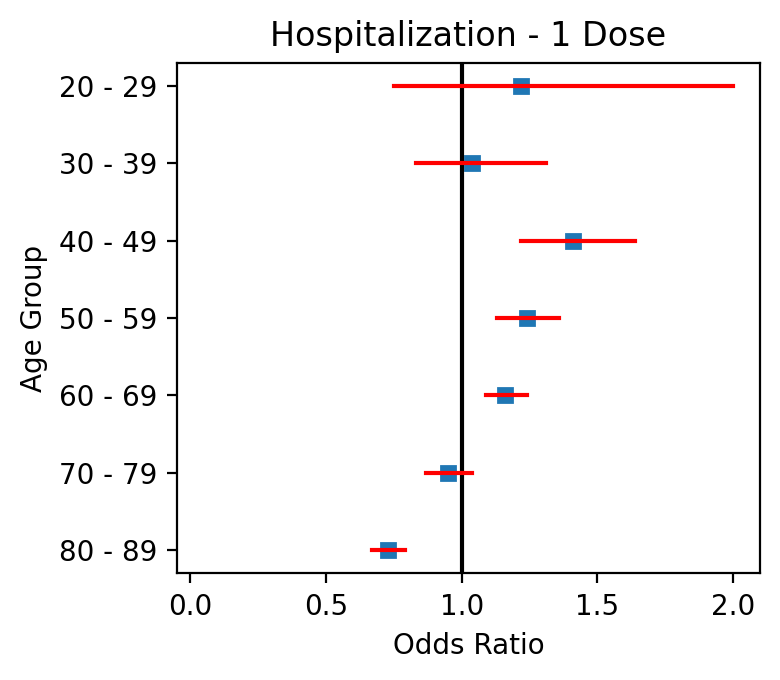

,No Dose_survived,No Dose_deceased,1 Dose_survived,1 Dose_deceased,OR,p-value,expectedByChance(EBC),1 Dose_survived/EBC-1,L95,U95
20,11543,610,394,17,1.22,0.249,390,0.01,0.75,2.00
30,31720,2290,1141,79,1.04,0.389,1137,0.00,0.83,1.31
40,44289,5070,2494,202,1.41,0.000,2422,0.03,1.22,1.64
50,44401,8103,3703,547,1.24,0.000,3602,0.03,1.13,1.36
60,25490,8626,4416,1287,1.16,0.000,4283,0.03,1.09,1.24
70,12574,6803,1552,881,0.95,0.147,1575,-0.01,0.87,1.04
80,5255,4199,1432,1564,0.73,0.000,1609,-0.11,0.67,0.79


In [20]:
print("No Dose vs 1 Dose - HOSPITALIZATION ONLY")
oddsRatioAnalyses={}
valuesForForestPlot={}
for ageG in ageGroupList:
    
    result=dict(df_covid[(df_covid['dataFirstDose'].notna()) & (df_covid['dataSecondDose'].isna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==2)]['EVOLUCAO'].value_counts())
    vacAlive=result[1]
    vacDeceased=result[2]

    result=dict(df_covid[(df_covid['dataFirstDose'].isna())  & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==2)]['EVOLUCAO'].value_counts())
    nonVacAlive=result[1]
    nonVacDeceased=result[2]
    #Add data to the summary df
    oddsRatioAnalyses[ageG]=OddsRatioMain("No Dose","1 Dose",
              nonVacAlive,
              nonVacDeceased,
              vacAlive,
              vacDeceased)
    #Add data to the forest plot
    valuesForForestPlot[ageG]=oddsWithInterval([
        [nonVacDeceased,nonVacAlive],
        [vacDeceased,vacAlive]
    ])
    
dfOneDoseHospital = pd.DataFrame(oddsRatioAnalyses).T
plotForestPlot(valuesForForestPlot,"Hospitalization - 1 Dose")
df_ConfidenceInterval = pd.DataFrame(valuesForForestPlot).T[['L95','U95']]
pd.merge(dfOneDoseHospital,df_ConfidenceInterval, left_index=True, right_index=True).astype({
    'No Dose_survived':"int",
    'No Dose_deceased':"int",
    '1 Dose_survived':"int",
    '1 Dose_deceased':"int",
    'expectedByChance(EBC)':"int",
})

###### Chance of survival
(2702/234) = 11.55 <br>
(15549/2464)  = 6.31<br>
(2702/234) /(15549/2464) = 1.83
###### one dose increase the odds of survival by 83%

No Dose vs 1 Dose - ICU ONLY


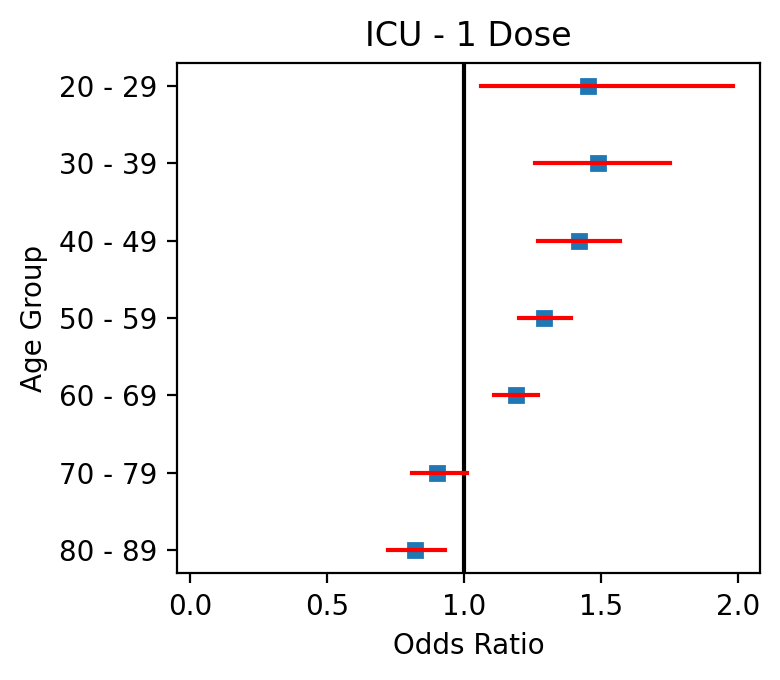

,No Dose_survived,No Dose_deceased,1 Dose_survived,1 Dose_deceased,OR,p-value,expectedByChance(EBC),1 Dose_survived/EBC-1,L95,U95
20,3058,1707,148,57,1.45,0.011,132,0.12,1.06,1.98
30,8808,6187,470,222,1.49,0.000,409,0.15,1.26,1.75
40,12366,12078,896,618,1.42,0.000,773,0.16,1.27,1.57
50,12610,18612,1364,1558,1.29,0.000,1195,0.14,1.20,1.39
60,7413,17953,1418,2891,1.19,0.000,1282,0.11,1.11,1.27
70,3611,11672,443,1583,0.90,0.041,474,-0.07,0.81,1.01
80,1425,5390,358,1650,0.82,0.001,405,-0.12,0.72,0.93


In [21]:
print("No Dose vs 1 Dose - ICU ONLY")
oddsRatioAnalyses={}
valuesForForestPlot={}
for ageG in ageGroupList:
    
    result=dict(df_covid[(df_covid['dataFirstDose'].notna()) & (df_covid['dataSecondDose'].isna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==1)]['EVOLUCAO'].value_counts())
    vacAlive=result[1]
    vacDeceased=result[2]

    result=dict(df_covid[(df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==1)]['EVOLUCAO'].value_counts())
    nonVacAlive=result[1]
    nonVacDeceased=result[2]
    #Add data to the summary df
    oddsRatioAnalyses[ageG]=OddsRatioMain("No Dose","1 Dose",
              nonVacAlive,
              nonVacDeceased,
              vacAlive,
              vacDeceased)
    #Add data to the forest plot
    valuesForForestPlot[ageG]=oddsWithInterval([
        [nonVacDeceased,nonVacAlive],
        [vacDeceased,vacAlive]
    ])
    
dfOneDoseICU = pd.DataFrame(oddsRatioAnalyses).T
plotForestPlot(valuesForForestPlot,"ICU - 1 Dose")
df_ConfidenceInterval = pd.DataFrame(valuesForForestPlot).T[['L95','U95']]
pd.merge(dfOneDoseICU,df_ConfidenceInterval, left_index=True, right_index=True).astype({
    'No Dose_survived':"int",
    'No Dose_deceased':"int",
    '1 Dose_survived':"int",
    '1 Dose_deceased':"int",
    'expectedByChance(EBC)':"int",
})

# 2 Dose

No Dose vs 2 Dose - HOSPITALIZATION ONLY


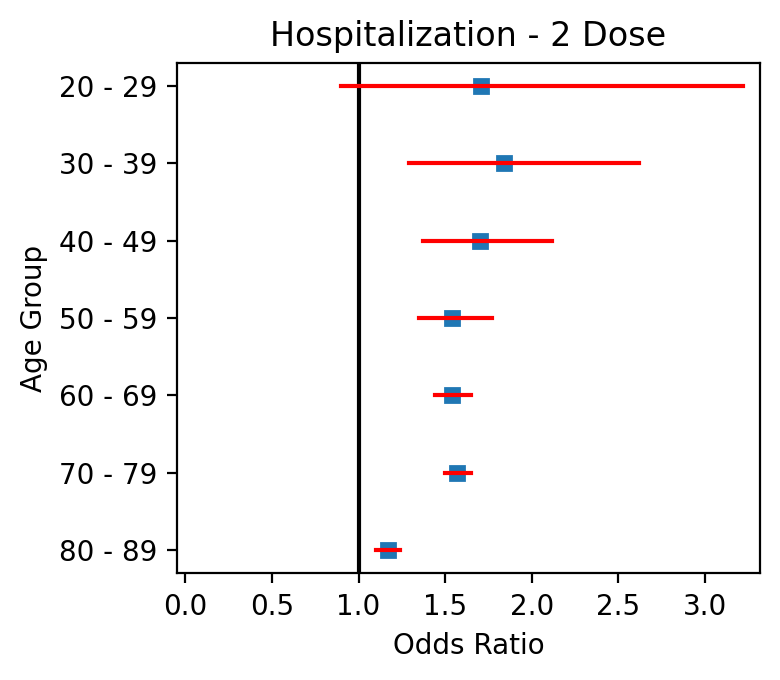

,No Dose_survived,No Dose_deceased,2 Dose_survived,2 Dose_deceased,OR,p-value,expectedByChance(EBC),2 Dose_survived/EBC-1,L95,U95
20,11543,610,323,10,1.71,0.054,316,0.02,0.90,3.22
30,31720,2290,815,32,1.84,0.000,790,0.03,1.29,2.62
40,44289,5070,1325,89,1.70,0.000,1270,0.04,1.37,2.12
50,44401,8103,1981,234,1.54,0.000,1877,0.06,1.35,1.77
60,25490,8626,5540,1215,1.54,0.000,5128,0.08,1.44,1.65
70,12574,6803,10028,3455,1.57,0.000,9273,0.08,1.50,1.65
80,5255,4199,5138,3506,1.17,0.000,4963,0.04,1.10,1.24


In [22]:
print("No Dose vs 2 Dose - HOSPITALIZATION ONLY")
oddsRatioAnalyses={}
valuesForForestPlot={}
for ageG in ageGroupList:
    
    result=dict(df_covid[(df_covid['dataSecondDose'].notna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==2)]['EVOLUCAO'].value_counts())
    vacAlive=result[1]
    vacDeceased=result[2]

    result=dict(df_covid[(df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==2)]['EVOLUCAO'].value_counts())
    nonVacAlive=result[1]
    nonVacDeceased=result[2]
    #Add data to the summary df
    oddsRatioAnalyses[ageG]=OddsRatioMain("No Dose","2 Dose",
              nonVacAlive,
              nonVacDeceased,
              vacAlive,
              vacDeceased)
    #Add data to the forest plot
    valuesForForestPlot[ageG]=oddsWithInterval([
        [nonVacDeceased,nonVacAlive],
        [vacDeceased,vacAlive]
    ])
    
dfTwoDoseHospital = pd.DataFrame(oddsRatioAnalyses).T
plotForestPlot(valuesForForestPlot,"Hospitalization - 2 Dose")
df_ConfidenceInterval = pd.DataFrame(valuesForForestPlot).T[['L95','U95']]
pd.merge(dfTwoDoseHospital,df_ConfidenceInterval, left_index=True, right_index=True).astype({
    'No Dose_survived':"int",
    'No Dose_deceased':"int",
    '2 Dose_survived':"int",
    '2 Dose_deceased':"int",
    'expectedByChance(EBC)':"int",
})

No Dose vs 2 Dose - ICU ONLY


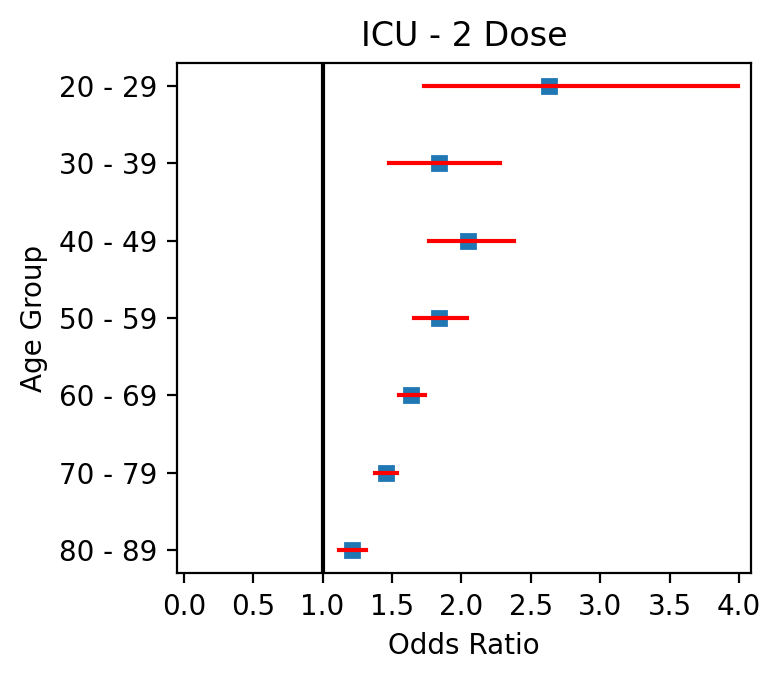

,No Dose_survived,No Dose_deceased,2 Dose_survived,2 Dose_deceased,OR,p-value,expectedByChance(EBC),2 Dose_survived/EBC-1,L95,U95
20,3058,1707,127,27,2.63,0.0,99,0.28,1.73,3.99
30,8808,6187,309,118,1.84,0.0,252,0.23,1.48,2.28
40,12366,12078,553,263,2.05,0.0,417,0.33,1.77,2.38
50,12610,18612,818,656,1.84,0.0,605,0.35,1.66,2.04
60,7413,17953,2284,3367,1.64,0.0,1766,0.29,1.55,1.74
70,3611,11672,3588,7959,1.46,0.0,3098,0.16,1.38,1.54
80,1425,5390,1676,5227,1.21,0.0,1560,0.07,1.12,1.31


In [23]:
print("No Dose vs 2 Dose - ICU ONLY")
oddsRatioAnalyses={}
valuesForForestPlot={}
for ageG in ageGroupList:
    
    result=dict(df_covid[(df_covid['dataSecondDose'].notna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==1)]['EVOLUCAO'].value_counts())
    vacAlive=result[1]
    vacDeceased=result[2]

    result=dict(df_covid[(df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG) & (df_covid['UTI']==1)]['EVOLUCAO'].value_counts())
    nonVacAlive=result[1]
    nonVacDeceased=result[2]
    #Add data to the summary df
    oddsRatioAnalyses[ageG]=OddsRatioMain("No Dose","2 Dose",
              nonVacAlive,
              nonVacDeceased,
              vacAlive,
              vacDeceased)
    #Add data to the forest plot
    valuesForForestPlot[ageG]=oddsWithInterval([
        [nonVacDeceased,nonVacAlive],
        [vacDeceased,vacAlive]
    ])
    
dfTwoDoseICU = pd.DataFrame(oddsRatioAnalyses).T
plotForestPlot(valuesForForestPlot,"ICU - 2 Dose")
df_ConfidenceInterval = pd.DataFrame(valuesForForestPlot).T[['L95','U95']]
pd.merge(dfTwoDoseICU,df_ConfidenceInterval, left_index=True, right_index=True).astype({
    'No Dose_survived':"int",
    'No Dose_deceased':"int",
    '2 Dose_survived':"int",
    '2 Dose_deceased':"int",
    'expectedByChance(EBC)':"int",
})

# Summary

In [24]:
df=pd.DataFrame()
df['1 Dose H']=dfOneDoseHospital['OR']
df['1 Dose I']=dfOneDoseICU['OR']
df['2 Dose H']=dfTwoDoseHospital['OR']
df['2 Dose I']=dfTwoDoseICU['OR']
df

,1 Dose H,1 Dose I,2 Dose H,2 Dose I
20,1.22,1.45,1.71,2.63
30,1.04,1.49,1.84,1.84
40,1.41,1.42,1.70,2.05
50,1.24,1.29,1.54,1.84
60,1.16,1.19,1.54,1.64
70,0.95,0.90,1.57,1.46
80,0.73,0.82,1.17,1.21


In [25]:
print(dfOneDoseHospital[['1 Dose_survived','1 Dose_deceased']].sum().sum() + dfOneDoseICU[['1 Dose_survived','1 Dose_deceased']].sum().sum())
print(dfTwoDoseHospital[['2 Dose_survived','2 Dose_deceased']].sum().sum() + dfTwoDoseICU[['2 Dose_survived','2 Dose_deceased']].sum().sum())

33385.0
60663.0


# Comorbidities

In [26]:
df_covid.shape

(454470, 57)

In [27]:
listOfComorbidities=["PUERPERA","CARDIOPATI","HEMATOLOGI","SIND_DOWN","HEPATICA","ASMA","DIABETES","NEUROLOGIC","PNEUMOPATI","IMUNODEPRE","RENAL","OBESIDADE","OUT_MORBI"]
df_covid[listOfComorbidities].head()

,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
12,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
30,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [28]:
dictDF = {}
for comorb in listOfComorbidities:
    dictAux = dict(df_covid[comorb].value_counts())
    dictDF[comorb]={}
    yes = dictAux[1]
    
    deceasedNon = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==2) & (df_covid['dataFirstDose'].isna())].shape[0]
    aliveNon = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==1) & (df_covid['dataFirstDose'].isna())].shape[0]
    deceased1Vac = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==2) & (df_covid['dataFirstDose'].notna())].shape[0]
    alive1Vac = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==1) & (df_covid['dataFirstDose'].notna())].shape[0]
    deceased2Vac = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==2) & (df_covid['dataSecondDose'].notna())].shape[0]
    alive2Vac = df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==1) & (df_covid['dataSecondDose'].notna())].shape[0]
    
    dictDF[comorb]['total']=yes
    dictDF[comorb]['lethality NonVac %']=round(100*deceasedNon/(deceasedNon+aliveNon))
    dictDF[comorb]['lethality OneVac %']=round(100*deceased1Vac/(deceased1Vac+alive1Vac))
    dictDF[comorb]['lethality TwoVac %']=round(100*deceased2Vac/(deceased2Vac+alive2Vac))
pd.DataFrame(dictDF).T.sort_values(by=['total'],ascending=False)

,total,lethality NonVac %,lethality OneVac %,lethality TwoVac %
CARDIOPATI,136606,44,47,47
OUT_MORBI,115446,42,48,48
DIABETES,95593,46,47,47
OBESIDADE,50293,43,45,46
RENAL,12425,58,63,62
NEUROLOGIC,11972,53,58,57
PNEUMOPATI,11632,53,58,57
ASMA,10381,33,37,37
IMUNODEPRE,8180,52,56,56
HEPATICA,3091,55,58,56


In [29]:
dictDF = {}
for comorb in listOfComorbidities:
    dictAux = dict(df_covid[comorb].value_counts())
    dictDF[comorb]={}
    yes = dictAux[1]
    no = dictAux[2]
    
    nonVacYes = df_covid[(df_covid[comorb]==1) & (df_covid['dataFirstDose'].isna())].shape[0]
    nonVacNo = df_covid[(df_covid[comorb]==2) & (df_covid['dataFirstDose'].isna())].shape[0]
    
    vacYes = df_covid[(df_covid[comorb]==1) & (df_covid['dataFirstDose'].notna())].shape[0]
    vacNo = df_covid[(df_covid[comorb]==2) & (df_covid['dataFirstDose'].notna())].shape[0]
    
    result = dict(df_covid[(df_covid[comorb]==1)]['EVOLUCAO'].value_counts())
    
    dictDF[comorb]['Total']=yes
    dictDF[comorb]['Total Lethality']=str(round(result[2]/(result[1]+result[2])*100))+'%'
    dictDF[comorb]['NonVac Presence']=str(round(nonVacYes/(nonVacNo+nonVacYes)*100))+'%'
    dictDF[comorb]['Vac Presence']=str(round(vacYes/(vacNo+vacYes)*100))+'%'
pd.DataFrame(dictDF).T.sort_values(by=['Total'],ascending=False)

,Total,Total Lethality,NonVac Presence,Vac Presence
CARDIOPATI,136606,45%,58%,70%
OUT_MORBI,115446,44%,53%,59%
DIABETES,95593,47%,42%,55%
OBESIDADE,50293,43%,28%,21%
RENAL,12425,60%,6%,10%
NEUROLOGIC,11972,55%,5%,11%
PNEUMOPATI,11632,55%,5%,10%
ASMA,10381,34%,6%,5%
IMUNODEPRE,8180,53%,4%,6%
HEPATICA,3091,56%,2%,2%


# Patients Per Number of Comorbidities

In [30]:
totalPatientsPerNumberComorbiditiesNonVac={}
totalPatientsPerNumberComorbiditiesNonVac_number={}
for ageG in ageGroupList:    
    df=df_covid[(df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG)][listOfComorbidities]
    totalComorbiditiesPerPatient={}
    for index, row in df.iterrows():
        totalComorbiditiesPerPatient[index]=0
        for como in listOfComorbidities:
            if(row[como]==1):
                totalComorbiditiesPerPatient[index]+=1
    
    totalPatientsPerNumberComorbiditiesNonVac[ageG]={}
    totalPatientsPerNumberComorbiditiesNonVac[ageG]['0']=0
    totalPatientsPerNumberComorbiditiesNonVac[ageG]['1']=0
    totalPatientsPerNumberComorbiditiesNonVac[ageG]['2']=0
    totalPatientsPerNumberComorbiditiesNonVac[ageG]['3']=0
    totalPatientsPerNumberComorbiditiesNonVac[ageG]['4+']=0
    
    for total in totalComorbiditiesPerPatient.values():
        if total > 3:
            totalPatientsPerNumberComorbiditiesNonVac[ageG]['4+']+=1
        else:
            totalPatientsPerNumberComorbiditiesNonVac[ageG][str(total)]+=1
            
    nPatients = df.shape[0]
    totalPatientsPerNumberComorbiditiesNonVac_number[ageG] = copy.deepcopy(totalPatientsPerNumberComorbiditiesNonVac[ageG])
    for n in totalPatientsPerNumberComorbiditiesNonVac[ageG]:
        totalPatientsPerNumberComorbiditiesNonVac[ageG][n]=str(round(totalPatientsPerNumberComorbiditiesNonVac[ageG][n]/nPatients*100))+'%'
dfNoVac=pd.DataFrame(totalPatientsPerNumberComorbiditiesNonVac).T
dfNoVac

,0,1,2,3,4+
20,64%,27%,8%,2%,0%
30,66%,24%,8%,2%,0%
40,58%,26%,11%,3%,1%
50,45%,30%,17%,6%,1%
60,32%,32%,24%,9%,3%
70,24%,32%,28%,12%,3%
80,23%,33%,29%,11%,4%


In [31]:
totalPatientsPerNumberComorbiditiesVac={}
for ageG in ageGroupList:    
    df=df_covid[(df_covid['dataFirstDose'].notna()) & (df_covid['ageGroup']==ageG)][listOfComorbidities]
    totalComorbiditiesPerPatient={}
    for index, row in df.iterrows():
        totalComorbiditiesPerPatient[index]=0
        for como in listOfComorbidities:
            if(row[como]==1):
                totalComorbiditiesPerPatient[index]+=1
    
    totalPatientsPerNumberComorbiditiesVac[ageG]={}
    totalPatientsPerNumberComorbiditiesVac[ageG]['0']=0
    totalPatientsPerNumberComorbiditiesVac[ageG]['1']=0
    totalPatientsPerNumberComorbiditiesVac[ageG]['2']=0
    totalPatientsPerNumberComorbiditiesVac[ageG]['3']=0
    totalPatientsPerNumberComorbiditiesVac[ageG]['4+']=0
    
    for total in totalComorbiditiesPerPatient.values():
        if total > 3:
            totalPatientsPerNumberComorbiditiesVac[ageG]['4+']+=1
        else:
            totalPatientsPerNumberComorbiditiesVac[ageG][str(total)]+=1
            
    nPatients = df.shape[0]
    for n in totalPatientsPerNumberComorbiditiesVac[ageG]:
        totalPatientsPerNumberComorbiditiesVac[ageG][n]=str(round(totalPatientsPerNumberComorbiditiesVac[ageG][n]/nPatients*100))+'%'
dfVac=pd.DataFrame(totalPatientsPerNumberComorbiditiesVac).T
dfVac

,0,1,2,3,4+
20,51%,33%,11%,3%,2%
30,50%,29%,15%,5%,1%
40,41%,31%,19%,8%,2%
50,28%,31%,26%,11%,4%
60,21%,30%,30%,14%,5%
70,18%,30%,32%,15%,6%
80,17%,32%,31%,15%,5%


In [32]:
for l in list(dfNoVac.index):
    for c in list(dfNoVac.columns):
        dfVac.loc[l,c]=dfNoVac.loc[l,c]+' | '+dfVac.loc[l,c]

In [33]:
dfVac

,0,1,2,3,4+
20,64% | 51%,27% | 33%,8% | 11%,2% | 3%,0% | 2%
30,66% | 50%,24% | 29%,8% | 15%,2% | 5%,0% | 1%
40,58% | 41%,26% | 31%,11% | 19%,3% | 8%,1% | 2%
50,45% | 28%,30% | 31%,17% | 26%,6% | 11%,1% | 4%
60,32% | 21%,32% | 30%,24% | 30%,9% | 14%,3% | 5%
70,24% | 18%,32% | 30%,28% | 32%,12% | 15%,3% | 6%
80,23% | 17%,33% | 32%,29% | 31%,11% | 15%,4% | 5%


# Average comorbidities per patient

In [34]:
df=df_covid[(df_covid['dataFirstDose'].isna())][listOfComorbidities]
totalComorbiditiesPerPatient={}
for index, row in df.iterrows():
    totalComorbiditiesPerPatient[index]=0
    for como in listOfComorbidities:
        if(row[como]==1):
            totalComorbiditiesPerPatient[index]+=1
            
totalComorb = sum(totalComorbiditiesPerPatient.values())
patientsWithOneOrMoreComor = len([k for k,v in totalComorbiditiesPerPatient.items() if v>0])
totalComorb/patientsWithOneOrMoreComor

1.6468216679878

In [35]:
df=df_covid[(df_covid['dataFirstDose'].notna())][listOfComorbidities]
totalComorbiditiesPerPatient={}
for index, row in df.iterrows():
    totalComorbiditiesPerPatient[index]=0
    for como in listOfComorbidities:
        if(row[como]==1):
            totalComorbiditiesPerPatient[index]+=1
            
totalComorb = sum(totalComorbiditiesPerPatient.values())
patientsWithOneOrMoreComor = len([k for k,v in totalComorbiditiesPerPatient.items() if v>0])
totalComorb/patientsWithOneOrMoreComor

1.9142969056012533

In [36]:
1.9142969056012533/1.6468216679878

1.162419066261299

In [37]:
1.6468216679878*0.1624

0.2674438388812187

In [38]:
def avgComorbiditiesPerIndex(df):
    totalComorbiditiesPerPatient={}
    for index, row in df.iterrows():
        totalComorbiditiesPerPatient[index]=0
        for como in listOfComorbidities:
            if(row[como]==1):
                totalComorbiditiesPerPatient[index]+=1
    return np.mean(list(totalComorbiditiesPerPatient.values()))

In [39]:
comorbiditiesPerPatient={}
for ageG in ageGroupList:
    comorbiditiesPerPatient[ageG]={}
    comorbiditiesPerPatient[ageG]['nonVac']=round(avgComorbiditiesPerIndex(df_covid[(df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG)][listOfComorbidities]),1)
    comorbiditiesPerPatient[ageG]['Vac']=round(avgComorbiditiesPerIndex(df_covid[(df_covid['dataFirstDose'].notna()) & (df_covid['ageGroup']==ageG)][listOfComorbidities]),1)
    comorbiditiesPerPatient[ageG]['Percent']=round(1-(comorbiditiesPerPatient[ageG]['nonVac']/comorbiditiesPerPatient[ageG]['Vac']),1)
pd.DataFrame(comorbiditiesPerPatient).T

,nonVac,Vac,Percent
20,0.5,0.7,0.3
30,0.5,0.8,0.4
40,0.6,1.0,0.4
50,0.9,1.3,0.3
60,1.2,1.5,0.2
70,1.4,1.6,0.1
80,1.4,1.6,0.1


# Weighting by age group
Since we can not directly compare Vaccinated with Non-Vaccinated due to the age gap, here we weigh the comorbidities by age group.
For each age group we add the Odds Ratio of each comorbidity lethality if the p-value is smaller than 0.05, and then present the average Odds Ratio.

In [40]:
dfPerAge={}
for ageG in ageGroupList:
    oddsRatioAnalyses={}
    for comorb in listOfComorbidities:
        oddsRatioAnalyses[comorb]=OddsRatioMain("No Dose","Dose",
                  df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==1) & (df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG)].shape[0],
                  df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==2) & (df_covid['dataFirstDose'].isna()) & (df_covid['ageGroup']==ageG)].shape[0],
                  df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==1) & (df_covid['dataFirstDose'].notna()) & (df_covid['ageGroup']==ageG)].shape[0],
                  df_covid[(df_covid[comorb]==1) & (df_covid['EVOLUCAO']==2) & (df_covid['dataFirstDose'].notna()) & (df_covid['ageGroup']==ageG)].shape[0]
             )
    dfPerAge[ageG] = pd.DataFrame(oddsRatioAnalyses).T

In [41]:
comorbiditiesOR={}
for ageG in ageGroupList:
    comorbiditiesOR[ageG]={}
    for index, row in dfPerAge[ageG][['OR','p-value']].iterrows():
        if(row['p-value']<0.01):
            comorbiditiesOR[ageG][index]=row['OR']
        else:
            comorbiditiesOR[ageG][index]='-'
pd.DataFrame(comorbiditiesOR)

,20,30,40,50,60,70,80
PUERPERA,5.4,4.66,-,-,-,-,-
CARDIOPATI,-,1.43,1.36,1.32,1.22,1.23,-
HEMATOLOGI,-,-,-,-,-,-,-
SIND_DOWN,-,-,-,-,-,-,-
HEPATICA,-,-,-,-,-,-,-
ASMA,8.58,-,2.13,1.58,1.51,-,-
DIABETES,-,-,1.4,1.32,1.32,1.23,-
NEUROLOGIC,-,-,-,-,-,1.37,-
PNEUMOPATI,-,-,-,-,1.21,-,-
IMUNODEPRE,-,-,-,-,1.27,-,-


In [42]:
print('Without p-value')
comorbiditiesOR={}
for ageG in ageGroupList:
    comorbiditiesOR[ageG]={}
    for index, row in dfPerAge[ageG][['OR','p-value']].iterrows():
        comorbiditiesOR[ageG][index]=row['OR']
pd.DataFrame(comorbiditiesOR)

Without p-value


,20,30,40,50,60,70,80
PUERPERA,5.40,4.66,1.62,2.92,11.00,0.64,0.30
CARDIOPATI,1.91,1.43,1.36,1.32,1.22,1.23,1.00
HEMATOLOGI,6.08,2.44,1.13,0.99,1.22,0.99,0.94
SIND_DOWN,0.91,1.50,1.68,0.93,1.45,1.70,1.79
HEPATICA,1.26,0.69,0.97,1.34,1.26,0.89,1.44
ASMA,8.58,1.39,2.13,1.58,1.51,1.27,0.80
DIABETES,1.37,1.15,1.40,1.32,1.32,1.23,1.03
NEUROLOGIC,1.41,1.35,1.33,1.31,1.14,1.37,0.95
PNEUMOPATI,0.65,1.28,1.51,0.88,1.21,1.13,0.99
IMUNODEPRE,1.27,1.48,1.20,1.04,1.27,1.08,0.83


# Working with dates

In [43]:
df_dates=df_covid.copy()

# Time in ICU

In [44]:
timeInICU={}
for ageG in ageGroupList:  
    timeInICU[ageG]={}
    timeInICU[ageG]['NonVac']=round(df_dates[(df_dates['dataFirstDose'].isna()) & (df_dates['ageGroup']==ageG)]['ICUtime'].mean())
    timeInICU[ageG]['Vac']=round(df_dates[(df_dates['dataFirstDose'].notna()) & (df_dates['ageGroup']==ageG)]['ICUtime'].mean())

In [45]:
pd.DataFrame(timeInICU).T

,NonVac,Vac
20,11,10
30,12,11
40,13,12
50,14,13
60,13,14
70,12,13
80,10,10


# First Dose to Symptons, Hospitalization, and Evolucao

In [46]:
print(df_dates[df_dates['dataFirstDose'].isna()]['hospitalizationToEvolution'].mean())
print(df_dates[df_dates['dataFirstDose'].notna()]['hospitalizationToEvolution'].mean())
print(df_dates[df_dates['dataSecondDose'].notna()]['hospitalizationToEvolution'].mean())

11.332379038160546
11.62196424612532
11.739642616730922


In [47]:
print(df_dates[df_dates['dataFirstDose'].isna()]['firstSymtonsToHospitalization'].mean())
print(df_dates[df_dates['dataFirstDose'].notna()]['firstSymtonsToHospitalization'].mean())
print(df_dates[df_dates['dataSecondDose'].notna()]['firstSymtonsToHospitalization'].mean())

8.589180150660406
6.75831872140597
6.696101829753381


In [48]:
print(df_dates[df_dates['dataFirstDose'].notna()]['firstDoseToSymptons'].mean())
print(df_dates[df_dates['dataSecondDose'].notna()]['secondDoseToSymptons'].mean())

102.0114779208739
94.2404228627379


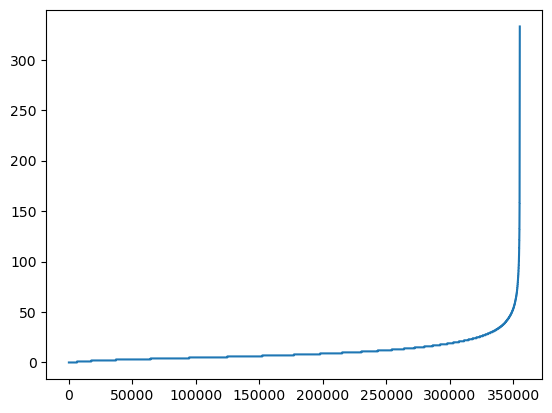

In [49]:
plt.plot(sorted(df_dates[df_dates['dataFirstDose'].isna()]['hospitalizationToEvolution']))
plt.show()

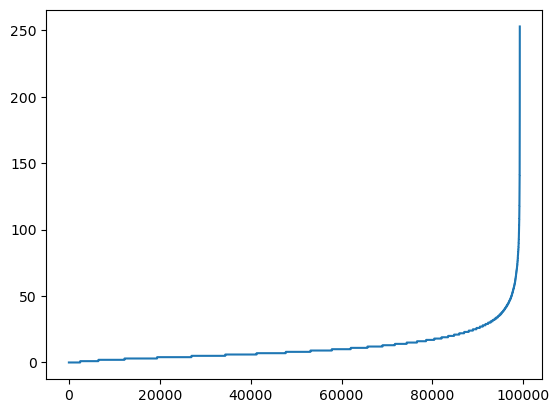

In [50]:
plt.plot(sorted(df_dates[df_dates['dataFirstDose'].notna()]['hospitalizationToEvolution']))
plt.show()

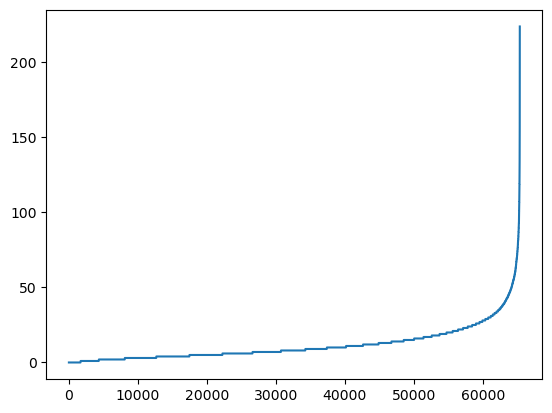

In [51]:
plt.plot(sorted(df_dates[df_dates['dataSecondDose'].notna()]['hospitalizationToEvolution']))
plt.show()

In [52]:
df_dates[df_dates['firstDoseToSymptons']>15].shape

(97869, 57)